# MNIST 데이터셋

In [1]:
! pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 3.0 MB 19.0 MB/s 
     |████████████████████████████████| 454 kB 44.3 MB/s 
     |████████████████████████████████| 2.9 MB 36.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalli

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
digit_mnist = keras.datasets.mnist

(_train_images, _train_labels), (test_images, test_labels) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images = _train_images[:50000]
train_labels = _train_labels[:50000]
val_images = _train_images[50000:]
val_labels = _train_labels[50000:]

In [69]:
train_images = np.expand_dims(train_images, -1)
val_images = np.expand_dims(val_images, -1)

In [70]:
train_images[0].shape

(28, 28, 1)

In [74]:
test_images = np.expand_dims(test_images, -1)
test_images
test_images[0].shape

(28, 28, 1)

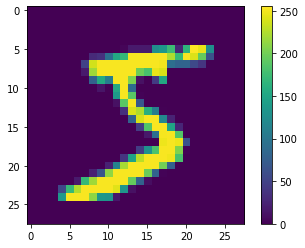

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

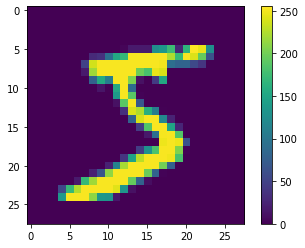

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
layer_cnn1 = keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))
layer_cnn2 = keras.layers.Conv2D(32, (3, 3), activation='relu')
layer_cnn3 = keras.layers.Conv2D(16, (3, 3), activation='relu')
layer_cnn4 = keras.layers.Conv2D(4, (3, 3), activation='relu')
layer_flatten = keras.layers.Flatten()
layer_FC1 = keras.layers.Dense(128, activation='relu')
layer_FC2 = keras.layers.Dense(64, activation='relu')
layer_FC3 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([
    layer_cnn1,
    layer_cnn2,
    layer_cnn3,
    layer_cnn4,
    layer_flatten,
    layer_FC1,
    layer_FC2,
    layer_FC3,
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 16)        4624      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 20, 20, 4)         580       
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

In [9]:
from IPython.display import Image 
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False, show_layer_names=True)

Image('model.png')

ImportError: ignored

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=20, validation_data=(train_images, train_labels))

Epoch 1/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2077 - accuracy: 0.9402 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0693 - accuracy: 0.9783 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0150 - val_accuracy: 0.9951
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0255 - val_accuracy: 0.9915
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0096 -

In [75]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.0896 - accuracy: 0.9852

테스트 정확도: 0.9851999878883362


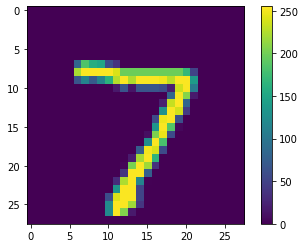

In [77]:
plt.figure()
plt.imshow(test_images[0][:, :, 0])
plt.colorbar()
plt.grid(False)
plt.show()

In [78]:
predictions = model.predict(test_images[:1, :, :])
print(predictions)

[[5.65758498e-24 5.96216804e-16 2.67164695e-14 6.89439159e-18
  2.21608986e-18 1.08234854e-20 8.82308185e-24 1.00000000e+00
  2.73979874e-16 2.10383642e-12]]


In [79]:
np.argmax(predictions)

7

In [80]:
print(test_images[0, :, :].shape)

(28, 28, 1)


In [17]:
! pip install keras2onnx

     |████████████████████████████████| 96 kB 3.2 MB/s 
     |████████████████████████████████| 12.3 MB 187 kB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=b270b79fa5f6b46aa148a089c1ac7fe4f49375a38468f6c16c13bfb8ff51784b
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [81]:
import keras2onnx

# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, model.name)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 30 -> 20
The maximum opset needed by this model is only 11.


In [82]:
temp_model_file = 'mnist-cnn.onnx'
keras2onnx.save_model(onnx_model, temp_model_file)

In [21]:
! pip install onnxruntime-gpu

     |████████████████████████████████| 95.6 MB 33 kB/s 


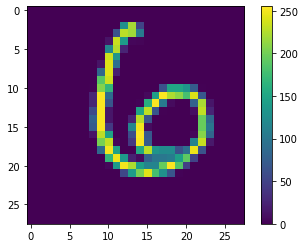

(28, 28, 1)
(1, 28, 28, 1)


In [87]:
test_images_float32 = test_images[100].astype(np.float32)[:, :, 0]

plt.figure()
plt.imshow(test_images_float32)
plt.colorbar()
plt.grid(False)
plt.show()

test_images_float32 = test_images[100].astype(np.float32)
type(test_images_float32)
print(test_images_float32.shape)
onnx_input = np.expand_dims(test_images_float32, axis=0)
print(onnx_input.shape)

In [56]:
import time

In [89]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("mnist-cnn.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# ONNX 런타임에서 계산된 결과값
ort_inputs = {ort_session.get_inputs()[0].name: onnx_input}
t0 = time.time()
ort_outs = ort_session.run(None, ort_inputs)
print(time.time() - t0)

print(np.argmax(ort_outs))

0.026050090789794922
6


/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:353: UserWarning: Deprecation warning. This ORT build has ['CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. The next release (ORT 1.10) will require explicitly setting the providers parameter (as opposed to the current behavior of providers getting set/registered by default based on the build flags) when instantiating InferenceSession.For example, onnxruntime.InferenceSession(..., providers=["CUDAExecutionProvider"], ...)
  "based on the build flags) when instantiating InferenceSession."


In [90]:
! pip install onnx-simplifier

In [92]:
! python3 -m onnxsim mnist-cnn.onnx simple-mnist-cnn.onnx --input-shape 1,28,28,1

Simplifying...
Note: The input shape of the simplified model will be overwritten by the value of '--input-shape' argument. Pass '--dynamic-input-shape' if it is not what you want. Run 'python3 -m onnxsim -h' for details.
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


In [94]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("simple-mnist-cnn.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# ONNX 런타임에서 계산된 결과값
ort_inputs = {ort_session.get_inputs()[0].name: onnx_input}
t0 = time.time()
ort_outs = ort_session.run(None, ort_inputs)
print(time.time() - t0)

print(np.argmax(ort_outs))

0.027162551879882812
6


/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:353: UserWarning: Deprecation warning. This ORT build has ['CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. The next release (ORT 1.10) will require explicitly setting the providers parameter (as opposed to the current behavior of providers getting set/registered by default based on the build flags) when instantiating InferenceSession.For example, onnxruntime.InferenceSession(..., providers=["CUDAExecutionProvider"], ...)
  "based on the build flags) when instantiating InferenceSession."
